<a href="https://colab.research.google.com/github/AbrahamKong/CMPE256-Dimensionality_Reduction_Assignment/blob/main/CMPE_256_Dimensionality_Reduction_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# import necessary library

%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

**PCA**

Using method in the Python Data Science Handbook by Jake VanderPlas

Generate a dataset with 10 dimensions using randomize data points

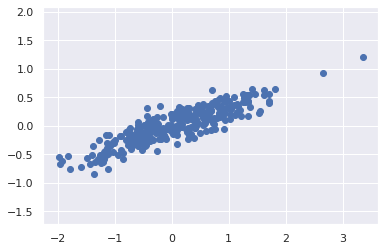

In [76]:
rng = np.random.RandomState(1)
tbdata = np.dot(rng.rand(10, 2), rng.randn(2, 300)).T
plt.scatter(tbdata[:, 0], tbdata[:, 1])
plt.axis('equal');

Use PCA to reduce to 1 feature


In [77]:
from sklearn.decomposition import PCA
pca = PCA(n_components=1)
pca.fit(tbdata)
tbdata_pca = pca.transform(tbdata)
print("Original Data:", tbdata.shape)
print("PCA Data: ", tbdata_pca.shape)

Original Data: (300, 10)
PCA Data:  (300, 1)


Plot the before-PCA and after-PCA data

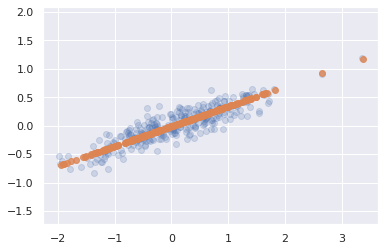

In [78]:
tbdata_transformed = pca.inverse_transform(tbdata_pca)
plt.scatter(tbdata[:, 0], tbdata[:, 1], alpha=0.2)
plt.scatter(tbdata_transformed[:, 0], tbdata_transformed[:, 1], alpha=0.8)
plt.axis('equal');

**SVD**

Use SVD reduce to 5 feature

In [84]:
from sklearn.utils.extmath import randomized_svd


u, s, vt = randomized_svd(tbdata, n_components = 5)

print("Original Data:", tbdata)

print("Left Singular Vectors:")
print(u)

print("Singular Values:") 
print(np.diag(s))

print("Right Singular Vectors:") 
print(vt)

Original Data: [[ 2.65600742e+00  9.16456503e-01  4.46252431e-01 ...  2.06314244e+00
   2.16643647e+00  7.59583728e-01]
 [ 1.35289641e-01  2.49172991e-01 -8.52745372e-02 ...  5.22733826e-01
   1.69713477e-03  8.94107429e-03]
 [ 3.99603760e-01  1.97881180e-01  3.51381563e-02 ...  4.34152332e-01
   2.93752154e-01  1.05466635e-01]
 ...
 [ 8.53437296e-01  3.04805931e-01  1.37883082e-01 ...  6.84235651e-01
   6.90585306e-01  2.42554769e-01]
 [ 1.14476975e+00  2.37558516e-01  2.76318308e-01 ...  5.64504463e-01
   1.01824260e+00  3.50521110e-01]
 [-7.54715640e-01 -2.01086824e-01 -1.58449119e-01 ... -4.63884863e-01
  -6.47436987e-01 -2.24555388e-01]]
Left Singular Vectors:
[[ 1.83266620e-01 -4.35928958e-03 -9.47377419e-02  5.79386385e-01
  -1.36606266e-01]
 [ 1.66100033e-02  7.89710195e-02 -2.40636301e-01  2.10744389e-01
  -3.92441609e-02]
 [ 2.97285174e-02  2.28088732e-02 -1.68754390e-02 -1.62219334e-02
  -7.24949126e-03]
 ...
 [ 5.92588703e-02  2.63809365e-03  2.62981934e-02 -5.46113386e-02


**LLE**

Use Manifold Example from the Python Data Science Handbook by Jake VanderPlas

Create Data in the shape of "CMPE 256"

1.   Crete "CMPE" img and plot
2.   Show "CMPE" in 3 dimensional
3.   Distort data for LLE



In [26]:
def make_CMPE(N=1000, rseed=42):
  # Make a plot with "CMPE 256", and then save as PNG
  fig, ax = plt.subplots(figsize=(4, 1))
  fig.subplots_adjust(left=0, right=1, bottom=0, top=1)
  ax.axis('off')
  ax.text(0.5, 0.4, "CMPE", va='center', ha='center', size='50')
  fig.savefig('CMPE.png')
  plt.close(fig)

  # Plot the points based on the above PNG
  from matplotlib.image import imread
  pngFile = imread("CMPE.png")[::-1, :, 0].T
  rng = np.random.RandomState(rseed)
  imgData = rng.rand(4 * N, 2)
  i, j = (imgData * pngFile.shape).astype(int).T
  mask = (pngFile[i, j] < 1)
  imgData = imgData[mask]
  imgData[:, 0] *= (pngFile.shape[0] / pngFile.shape[1])
  imgData = imgData[:N]
  return imgData[np.argsort(imgData[:, 0])]

def random_projection(imgData, dimension=3, rseed=42):
    assert dimension >= imgData.shape[1]
    rng = np.random.RandomState(rseed)
    C = rng.randn(dimension, dimension)
    e, V = np.linalg.eigh(np.dot(C, C.T))
    return np.dot(imgData, V[:imgData.shape[1]])

def curve_img(imgData):
    t = (imgData[:, 0] - 2) * 0.75 * np.pi
    x = np.sin(t)
    y = imgData[:, 1]
    z = np.sign(t) * (np.cos(t) - 1)
    return np.vstack((x, y, z)).T


Original Data

(0.9776930167739997,
 3.0232691208441915,
 0.18454372464678526,
 0.7377678858819284)

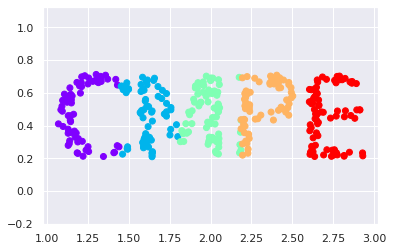

In [21]:
imgData = make_CMPE(1000)
colorize = dict(c=imgData[:, 0], cmap=plt.cm.get_cmap('rainbow', 5))
plt.scatter(imgData[:, 0], imgData[:, 1], **colorize)
plt.axis('equal')

Data in 3 dimension

In [27]:
imgData_3D = random_projection(imgData, 3)
imgData_3D.shape

(364, 3)

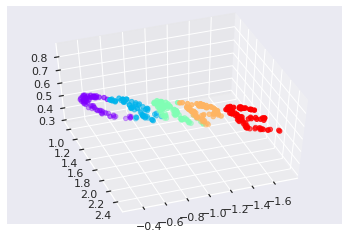

In [29]:
from mpl_toolkits import mplot3d
ax = plt.axes(projection='3d')
ax.scatter3D(imgData_3D[:, 0], imgData_3D[:, 1], imgData_3D[:, 2],
             **colorize)
ax.view_init(azim=70, elev=50)

Curve Data for LLE practice

(-1.099993073336072,
 1.0999618630401933,
 0.18454372464678526,
 0.7377678858819284)

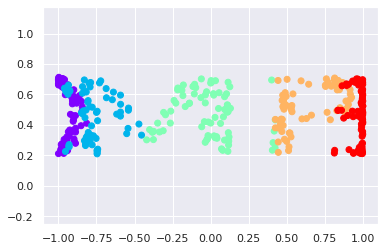

In [33]:
imgData_curve = curve_img(imgData)

plt.scatter(imgData_curve[:, 0], imgData_curve[:, 1], **colorize)
plt.axis('equal')

LLE

Result is still a bit distorted, 
but keep the original relationships in the data

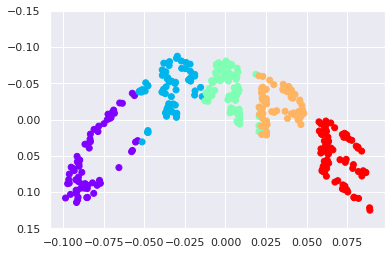

In [34]:
from sklearn.manifold import LocallyLinearEmbedding
model = LocallyLinearEmbedding(n_neighbors=100, n_components=2, method='modified',
                               eigen_solver='dense')
output = model.fit_transform(imgData_curve)

fig, ax = plt.subplots()
ax.scatter(output[:, 0], output[:, 1], **colorize)
ax.set_ylim(0.15, -0.15);

**ISOMAP**

**UMAP**